In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from knn_classifier import knn_classifier
from tslearn.datasets import UCR_UEA_datasets

In [2]:
data = UCR_UEA_datasets().list_multivariate_datasets()

In [22]:
k = 19
data[k]

'MotorImagery'

In [ ]:
x_train, y_train, x_test, y_test = UCR_UEA_datasets().load_dataset(data[k])

In [21]:
x_train.shape

(2459, 36, 6)

In [15]:
x_test.shape

(180, 45, 2)

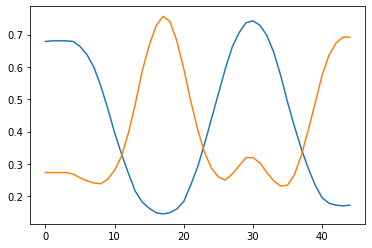

In [18]:
plt.plot(x_train[0])
plt.show()

In [13]:
label, proba, acc_score, conf_mat = knn_classifier(x_train, x_test, y_train, y_test, sub_rate=0.5, metric='sig',
                                                   length=x_train.shape[1], replace=False, n_neighbours=1, gamma=0.1, n=2)

In [14]:
acc_score

0.6944444444444444

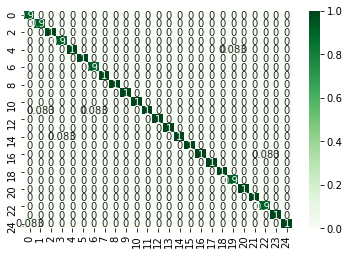

In [17]:
sns.heatmap(conf_mat, cmap="Greens", annot=True)
plt.show()